In [1]:
import pandas as pd
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt

pd.options.display.max_columns = 999
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

import joblib

In [3]:
import shap

# Load Data

In [4]:
base_2018_encoded = pd.read_csv("../data/processed/base_tratada.csv")

In [5]:
print("Formato do banco de dados",base_2018_encoded.shape)
base_2018_encoded.describe()

Formato do banco de dados (9929, 447)


,ano_ingresso,frequentou_cursinho,escolaridade_pai,escolaridade_mae,forma_ingresso [Ampla concorrência],forma_ingresso [PEC-G/Transferência Ex Officio/Decisão Judicial],"forma_ingresso [Reserva de vagas (autodeclarado preto, pardo ou indígena)]",forma_ingresso [Reserva de vagas (cursado integralmente o ensino médio em escolas públicas)],forma_ingresso [Reserva de vagas (pessoa com deficiência)],forma_ingresso [Reserva de vagas (refugiado ou solicitante de refúgio - incluindo situação de vulnerabilidade econômica)],"forma_ingresso [Reserva de vagas (renda familiar bruta per capita igual ou inferior a 1,5 salário mínimo)]",forma_ingresso [Transferência externa],forma_ingresso [Prefiro não responder],idade,sexo_biologico,nmr_filhos,meio_transporte [Caminhando (percurso total)],meio_transporte [Caminhando (parte do percurso)],meio_transporte [Bicicleta],meio_transporte [Carona],meio_transporte [Fretado/van],meio_transporte [Metrô],meio_transporte [Ônibus da UFABC],meio_transporte [Transporte particular (carro)],meio_transporte [Transporte particular (moto)],meio_transporte [Uber/taxi],meio_transporte [Trem],meio_transporte [Trólebus/ônibus - exceto ônibus da UFABC],meio_transporte [Prefiro não responder],tempo_medio_chegada_na_ufabc,atividade_extraclasse [Não participo de atividades extraclasse relacionadas à UFABC],atividade_extraclasse [AIESEC],atividade_extraclasse [Atividades culturais],atividade_extraclasse [Atividades de extensão],atividade_extraclasse [Atividades esportivas],atividade_extraclasse [AXIS  Atlética UFABC/CAAP],atividade_extraclasse [Coletivos de cunho religioso],atividade_extraclasse [Coletivos relacionados ao ativismo político],atividade_extraclasse [Coletivos relacionados ao empreendedorismo],atividade_extraclasse [Cursos de idiomas],atividade_extraclasse [DCE/Diretório Acadêmico/Centros Acadêmicos.],atividade_extraclasse [Empresas júniores],atividade_extraclasse [ENACTUS UFABC],atividade_extraclasse [Coletivos LGBTQ+],atividade_extraclasse [Coletivos feministas],atividade_extraclasse [Coletivos étnico-raciais],atividade_extraclasse [GPDA UFABC],atividade_extraclasse [Infanteria UFABC],atividade_extraclasse [Ramo Estudantil IEEE da UFABC],"atividade_extraclasse [Representação discente (ConsUni, ConsEPE, Comissões, etc)]",atividade_extraclasse [UFABC Cheer],atividade_extraclasse [Outras atividades extraclasse (não listadas acima)],atividade_extraclasse [Prefiro não responder],nivel_conhecimento_idioma [Alemão],nivel_conhecimento_idioma [Espanhol],nivel_conhecimento_idioma [Francês],nivel_conhecimento_idioma [Inglês],nivel_conhecimento_idioma [Italiano],nivel_conhecimento_idioma [Japonês],nivel_conhecimento_idioma [Libras],dificuldades [Nenhuma],dificuldades [Acessibilidade nas dependências da UFABC],dificuldades [Assuntos familiares/pessoais],dificuldades [Déficit de formação acadêmica básica],dificuldades [Didática dos docentes],dificuldades [Discriminações e preconceitos],dificuldades [Falta de disciplina/hábito de estudo],dificuldades [Problemas de saúde/psicológicos],dificuldades [Questões financeiras],dificuldades [Questões profissionais],dificuldades [Prefiro não responder],dificuldades_emocionais [Nenhuma],dificuldades_emocionais [Ansiedade],"dificuldades_emocionais [Desânimo, falta de vontade de fazer as coisas]",dificuldades_emocionais [Distúrbios alimentares],"dificuldades_emocionais [Ideia de morte (Pensamentos homicidas, medo da morte, etc)]",dificuldades_emocionais [Medo/pânico],dificuldades_emocionais [Pensamento suicida],dificuldades_emocionais [Sensação de desamparo/desespero/desesperança],dificuldades_emocionais [Sensação de desatenção/desorientação/confusão mental],dificuldades_emocionais [Sentimento de solidão],dificuldades_emocionais [Timidez excessiva],dificuldades_emocionais [Tristeza persistente],dificuldades_emocionais [Prefiro não responder],preconceito_discriminacao [Não],"preconceito_discriminacao [Sim, pela instituição de ensino em que cursei o ensino médio]","preconceito_discrimi

## Data Pruning
<p>Em teoria, não seria necessária a retirada de nenhum dado 
(não foi identificado a existência de ruido ou outliers negativos),<br>
mas alguns dados seriam impossíveis de serem coletados de ingressantes, então 
serão descartados </p>

In [6]:
columns = {}
for c in base_2018_encoded.columns:
    c = c.split('[')[0]
    if c in columns:
        columns[c]+=1
    else:
        columns[c]=1

In [7]:
print('numero de colunas:',len(columns))
list(columns.keys())

numero de colunas: 66


['ano_ingresso',
 'frequentou_cursinho',
 'escolaridade_pai',
 'escolaridade_mae',
 'forma_ingresso ',
 'idade',
 'sexo_biologico',
 'nmr_filhos',
 'meio_transporte ',
 'tempo_medio_chegada_na_ufabc',
 'atividade_extraclasse ',
 'nivel_conhecimento_idioma ',
 'dificuldades ',
 'dificuldades_emocionais ',
 'preconceito_discriminacao ',
 'assedio ',
 'fumante',
 'consome_bebidas_alcoolicas',
 'doenca_cronica ',
 'favoravel_cotas ',
 'pdv_diversidade ',
 'pos-bct_pretende ',
 'pos-bct_matriculado ',
 'pos-bch_pretende ',
 'pos-bch_matriculado ',
 'deseja_solicitar_transf_interna',
 'possui_reprovacoes',
 'trancamento_matricula',
 'motivo_trancamento_matricula ',
 'mobilidade_academica',
 'programa_desenv_acad ',
 'CR',
 'CA',
 'horas_semanais_na_ufabc',
 'obj_pos_conclusao ',
 'nota_infraestrutura_sa ',
 'nota_infraestrutura_sbc ',
 'nota ',
 'renda_familiar_mensal',
 'qtd_pessoas_familia',
 'principal_mantedor_familia ',
 'salario_mensal',
 'atividade_remunerada',
 'programa_assist_estud

In [8]:
remover =['possui_reprovacoes',
          'trancamento_matricula',
          'motivo_trancamento_matricula ',
          'mobilidade_academica',
          'programa_desenv_acad ',
          'ano_ingresso',
          'pos-bct_matriculado',
          'pos-bct_matriculado',
          'nota']

In [9]:
base_2018_encoded.filter(regex='frequencia_ru').head()

,frequencia_ru
0,-1.0
1,2.0
2,4.0
3,3.0
4,2.0


In [10]:
for r in remover:
    contem = []
    for c in base_2018_encoded.columns:
        if r in c:
            contem.append(c)
    base_2018_encoded.drop(contem,axis=1,inplace=True)

In [11]:
columns = {}
for c in base_2018_encoded.columns:
    c = c.split('[')[0]
    if c in columns:
        columns[c]+=1
    else:
        columns[c]=1

In [12]:
print('numero de colunas:',len(columns))
list(columns.keys())

numero de colunas: 55


['frequentou_cursinho',
 'escolaridade_pai',
 'escolaridade_mae',
 'forma_ingresso ',
 'idade',
 'sexo_biologico',
 'nmr_filhos',
 'meio_transporte ',
 'tempo_medio_chegada_na_ufabc',
 'atividade_extraclasse ',
 'nivel_conhecimento_idioma ',
 'dificuldades ',
 'dificuldades_emocionais ',
 'preconceito_discriminacao ',
 'assedio ',
 'fumante',
 'consome_bebidas_alcoolicas',
 'doenca_cronica ',
 'favoravel_cotas ',
 'pdv_diversidade ',
 'pos-bct_pretende ',
 'pos-bch_pretende ',
 'pos-bch_matriculado ',
 'deseja_solicitar_transf_interna',
 'CR',
 'CA',
 'horas_semanais_na_ufabc',
 'obj_pos_conclusao ',
 'renda_familiar_mensal',
 'qtd_pessoas_familia',
 'principal_mantedor_familia ',
 'salario_mensal',
 'atividade_remunerada',
 'programa_assist_estudantil ',
 'frequencia_ru',
 'valor_gasto_alimentacao_interna',
 'como_conheceu ',
 'motivo_escolha ',
 'estado_civil ',
 'identidade_genero ',
 'orientacao_sexual ',
 'cor/raca ',
 'onde_reside ',
 'regiao_sp_reside ',
 'consome_subst_psicoati

# Classificador

#### Para classificar o CR iremos excluir todos que não possuem CR registrado

In [13]:
base_2018_encoded.dropna(subset=['CR'],inplace=True)

#### Separando target

In [14]:
X = base_2018_encoded.drop(['CR','CA'],axis=1)
y = base_2018_encoded['CR']

### Análise do Target

Media do CR: 2.3
Desvio padrão: 0.76


Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


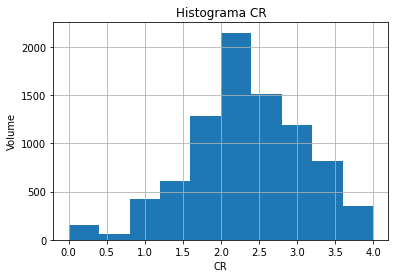

In [15]:
print('Media do CR:','{0:.2}'.format(y.mean()))
print('Desvio padrão:','{0:.2}'.format(y.std()))
fig,axs=plt.subplots(1,1)
axs.set_title('Histograma CR')
axs.set_ylabel('Volume')
axs.set_xlabel('CR')
y.hist(ax=axs)
fig.savefig('../output/figures/histograma_cr.png')
fig.show()

Distribuição do target:
Acima de 2     6029
Abaixo de 2    2540
Name: CR, dtype: int64


Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


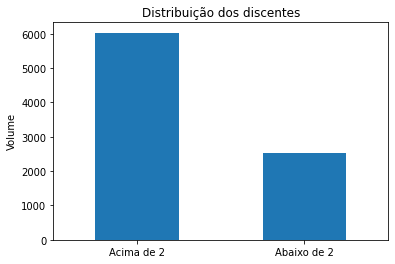

In [16]:
print('Distribuição do target:')
print((y<2).map({True:'Abaixo de 2',False:'Acima de 2'}).value_counts())
fig,axs=plt.subplots(1,1)
axs.set_title('Distribuição dos discentes')
axs.set_ylabel('Volume')
(y<2).map({True:'Abaixo de 2',False:'Acima de 2'}).value_counts().plot(ax=axs,kind='bar',rot=0)
fig.savefig('../output/figures/distribuicao_classes.png')
fig.show()

#### Preenchendo valores nulos com a média

In [17]:
X.fillna(base_2018_encoded.mean(),inplace=True)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [19]:
## Garantindo indices resetados
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)


X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [20]:
y_label = y<2

In [21]:
y_label_train = y_train<2
y_label_test = y_test<2  

In [22]:
y_label.value_counts()

False    6029
True     2540
Name: CR, dtype: int64

#### Como a base está desbalanceada, sera feito o oversample da classe alvo

In [23]:
sm = SMOTE(sampling_strategy='minority',random_state=12)

In [24]:
X_train_os, y_label_train_os = sm.fit_resample(X_train, y_label_train)

In [25]:
y_label_train_os.value_counts()

False    4522
True     4522
Name: CR, dtype: int64

In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 300, num = 10)]
# Minimum number of samples for split
min_samples_split = range(2,10)
max_depth.append(None)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 50,
    verbose=True,
    n_jobs = 3,
    cv = 5)

In [27]:
rf_random.fit(X_train_os, y_label_train_os)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=3,
                   param_distributions={'max_depth': [50, 77, 105, 133, 161,
                                                      188, 216, 244, 272, 300,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=True)

In [28]:
rf_random.best_score_

0.781197380844059

In [29]:
best_rf = rf_random.best_estimator_

In [30]:
best_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=133, max_features='sqrt', min_samples_split=3,
                       n_estimators=400)>

In [31]:
best_rf.fit(X_train_os,y_label_train_os)

RandomForestClassifier(max_depth=133, max_features='sqrt', min_samples_split=3,
                       n_estimators=400)

In [32]:
joblib.dump(best_rf,'../models/random_forest_classifier_cr_prediction_entry_data.pkl')

['../models/random_forest_classifier_cr_prediction_entry_data.pkl']

In [33]:
best_rf = joblib.load('../models/random_forest_classifier_cr_prediction_entry_data.pkl')

In [34]:
best_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 133,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
best_rf.fit(X_train_os,y_label_train_os)

RandomForestClassifier(max_depth=133, max_features='sqrt', min_samples_split=3,
                       n_estimators=400)

In [36]:
pb = best_rf.predict_proba(X_test)
probability =[]
for p in pb:
    probability.append(p[1])

In [37]:
y_score = best_rf.predict(X_test)

In [38]:
accuracy_score(y_label_test,y_score)

0.7349510032664489

## Precision vs. Recall

In [39]:
best_rf.predict_proba(X_test)[:,1].argmin()

559

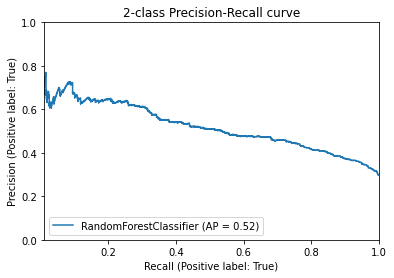

In [40]:
disp = plot_precision_recall_curve(best_rf, X_test, y_label_test)
disp.ax_.set_title('2-class Precision-Recall curve')
disp.ax_.set_ylim(0,1.0)
disp.ax_.set_xlim(.01,1)
disp.ax_.get_figure().savefig('../output/figures/precision-recall-curve.png')

In [41]:
predict_p = [x[1] for x in best_rf.predict_proba(X_test)]
fpr,tpr, thresholds = roc_curve(y_label_test,predict_p)
aux_dict = {
    'fpr':fpr,
    'tpr':tpr,
    'thresholds': thresholds
}
df_scores = pd.DataFrame(aux_dict)

In [42]:
recalls = []
precisions = []
for i in thresholds:
    predictions_aux = predict_p>=i
    true_p = (predictions_aux==True) & (y_label_test==True)
    if(True in true_p.value_counts().index):
        tp = true_p.value_counts()[True]
    else:
        tp=0
    #print(tp)
    false_n = (predictions_aux==False) & (y_label_test==True)
    if(True in false_n.value_counts().index):
        fn = false_n.value_counts()[True]
    else:
        fn = 0
    false_p = (predictions_aux==True) & (y_label_test==False)
    if(True in false_p.value_counts().index):
        fp = false_p.value_counts()[True]
    else:
        fp = 0
    #print(fn)
    recalls.append(tp/(tp+fn))
    if((tp+fp)==0):
        precisions.append(0)
    else:
        precisions.append(tp/(tp+fp))
df_scores['recalls'] = recalls
df_scores['precisions'] = precisions

In [43]:
df_scores.loc[(df_scores['recalls']>0.75) & (df_scores['recalls']<=0.8)]

,fpr,tpr,thresholds,recalls,precisions
547,0.396151,0.751572,0.309375,0.751572,0.444651
548,0.396815,0.751572,0.308625,0.751572,0.444238
549,0.396815,0.753145,0.308583,0.753145,0.444754
550,0.399469,0.753145,0.308333,0.753145,0.443108
551,0.399469,0.754717,0.307292,0.754717,0.443623
552,0.401460,0.754717,0.306667,0.754717,0.442396
553,0.401460,0.759434,0.305625,0.759434,0.443934
554,0.402787,0.759434,0.305625,0.759434,0.443119
555,0.406768,0.759434,0.304667,0.759434,0.440693
556,0.406768,0.762579,0.303792,0.762579,0.441712


In [44]:
def predict_with_th(classificator,threshold,X):
    predictions_p = classificator.predict_proba(X)
    predictions_p_p = [x[1] for x in predictions_p]
    return [x>=threshold for x in predictions_p_p]

In [45]:
predictions_with_th = predict_with_th(best_rf,0.290218,X_test)

In [46]:
print("ROC-Auc do modelo implementando o Threshold para Recall 0.8")
print("Acurácia: {0:.2%}".format(accuracy_score(y_label_test,predictions_with_th)))
print("Recall: {0:.2%}".format(recall_score(y_label_test,predictions_with_th)))
print("Precision: {0:.2%}".format(precision_score(y_label_test,predictions_with_th)))
print("ROC Auc: {0:.2%}".format(roc_auc_score(y_label_test,predictions_with_th)))

ROC-Auc do modelo implementando o Threshold para Recall 0.8
Acurácia: 62.39%
Recall: 77.99%
Precision: 42.69%
ROC Auc: 66.90%


## Roc Curve

In [47]:
def plot_roc_curve(fpr,tpr, thresholds):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.title('Roc Curve Analysis')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="center right")
    
    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r')
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])
    
    
    
    plt.savefig('../output/figures/roc_and_threshold.png')
    plt.show()
    plt.close()

In [48]:
predict_p = [x[1] for x in best_rf.predict_proba(X_test)]
fpr,tpr, thresholds = roc_curve(y_label_test,predict_p)

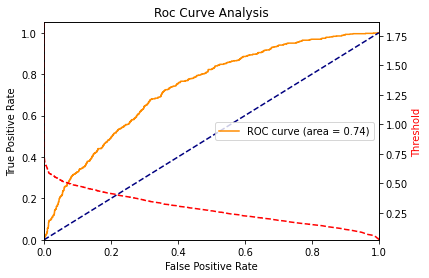

In [49]:
plot_roc_curve(fpr,tpr,thresholds)

# Compiling Results

In [50]:
results_df = pd.DataFrame(best_rf.predict_proba(X_test),columns=best_rf.classes_)
results_df['Predictions'] = best_rf.predict(X_test)
results_df['Real class'] = y_label_test.tolist()
results_df['Correct'] = results_df['Predictions']==results_df['Real class']
results_df['True Positive'] = (results_df['Predictions']==True) & (results_df['Real class']==True)
results_df['False Negative'] = (results_df['Predictions']==False) & (results_df['Real class']==True)

In [51]:
results_df 

,False,True,Predictions,Real class,Correct,True Positive,False Negative
0,0.883583,0.116417,False,False,True,False,False
1,0.554208,0.445792,False,True,False,False,True
2,0.714190,0.285810,False,False,True,False,False
3,0.672125,0.327875,False,False,True,False,False
4,0.685833,0.314167,False,False,True,False,False
...,...,...,...,...,...,...,...
2138,0.818083,0.181917,False,False,True,False,False
2139,0.610125,0.389875,False,False,True,False,False
2140,0.405292,0.594708,True,True,True,True,False
2141,0.803333,0.196667,False,False,True,False,False


# Analisando as Features

In [52]:
importances = best_rf.feature_importances_
dict_aux = {
    'name':X_train.columns.tolist(),
    'importance':importances
}
df_importancias = pd.DataFrame(dict_aux).sort_values('importance',ascending=False).reset_index().drop('index',axis=1)

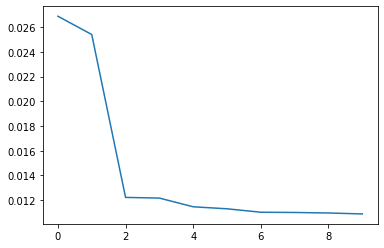

In [53]:
plt.plot(df_importancias['importance'].head(10))

In [54]:
df_importancias.head(20)

,name,importance
0,forma_ingresso [Ampla concorrência],0.026891
1,idade,0.025412
2,pos-bct_pretende [Bacharelado em Física],0.012214
3,horas_semanais_na_ufabc,0.012159
4,forma_ingresso [PEC-G/Transferência Ex Officio...,0.011454
5,forma_ingresso [Transferência externa],0.011291
6,forma_ingresso [Prefiro não responder],0.011012
7,campus_atual [Somente no campus São Bernardo d...,0.010993
8,forma_ingresso [Reserva de vagas (refugiado ou...,0.010950
9,pos-bct_pretende [Nenhum],0.010876


# Shap Value

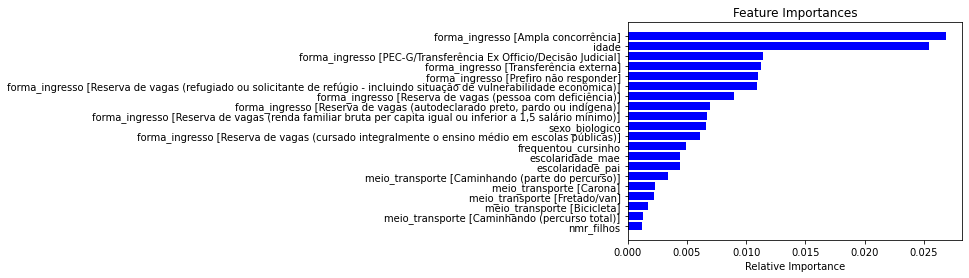

In [55]:
importances = best_rf.feature_importances_[:20]
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [56]:
rf_shap_values = shap.TreeExplainer(best_rf).shap_values(X_test)

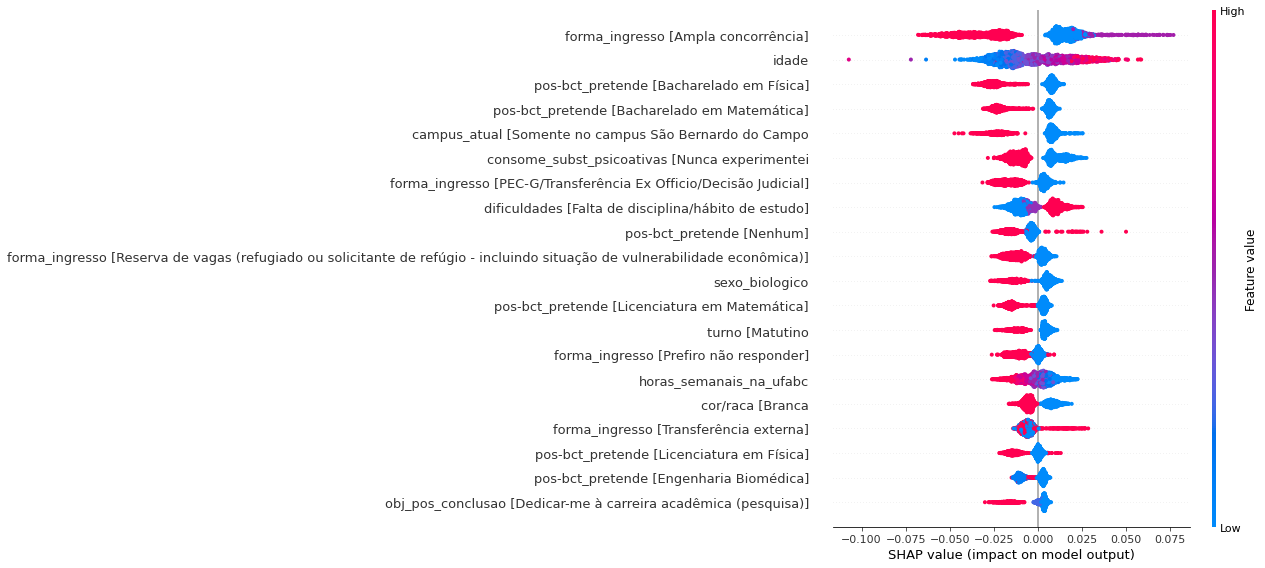

In [57]:
shap.summary_plot(rf_shap_values[1], X_test)

In [58]:
#X_test_sample = X_test.sample(n=500)

In [59]:
#k_shap = shap.KernelExplainer(best_rf.predict,X_test_sample)

In [60]:
#k_shap_values = k_shap.shap_values(X_test_sample)

In [61]:
# enum={}
# reverse_enum={}
# for i in range(0,len(X_test_sample.columns)):
#     enum[X_test_sample.columns[i]]=str(i)
#     reverse_enum[str(i)]=X_test_sample.columns[i]

In [62]:
# shap.summary_plot(k_shap_values, X_test_sample)